# Italy  

This analysis shows the available data for italy with different plots in order to make sense of the impact that the coronavirus is generating.    


The dataset used for this analysis has information about coronavirus in Italy for February and March, 2020.   
You can find the dataset here: https://www.kaggle.com/sudalairajkumar/covid19-in-italy.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from IPython.display import clear_output    
import time

Let's load the data and show the first rows.   

- The variables SNO and COuntry are dropped, since SNO corresponds to the identifier and Country is always Italy.
- From the date month and day variables are created.  

In [3]:
df_italy = pd.read_csv('covid19-in-italy/covid19_italy_region.csv')

df_italy['Date'] = pd.to_datetime(df_italy['Date'])
df_italy['month'] = df_italy['Date'].dt.month
df_italy['day'] = df_italy['Date'].dt.day
df_italy['Date'] = df_italy['Date'].dt.strftime('%Y-%m-%d')

df_italy.drop(['SNo','Country'], axis=1, inplace=True)
df_italy.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed,month,day
0,2020-02-24,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,2,24
1,2020-02-24,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,2,24
2,2020-02-24,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,2,24
3,2020-02-24,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,2,24
4,2020-02-24,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,2,24


In [4]:
df_italy.sort_values(by='Date', inplace=True)

## Impact over time
Let's visualize how the positive cases, deaths and hospitalized patients increased over time... 

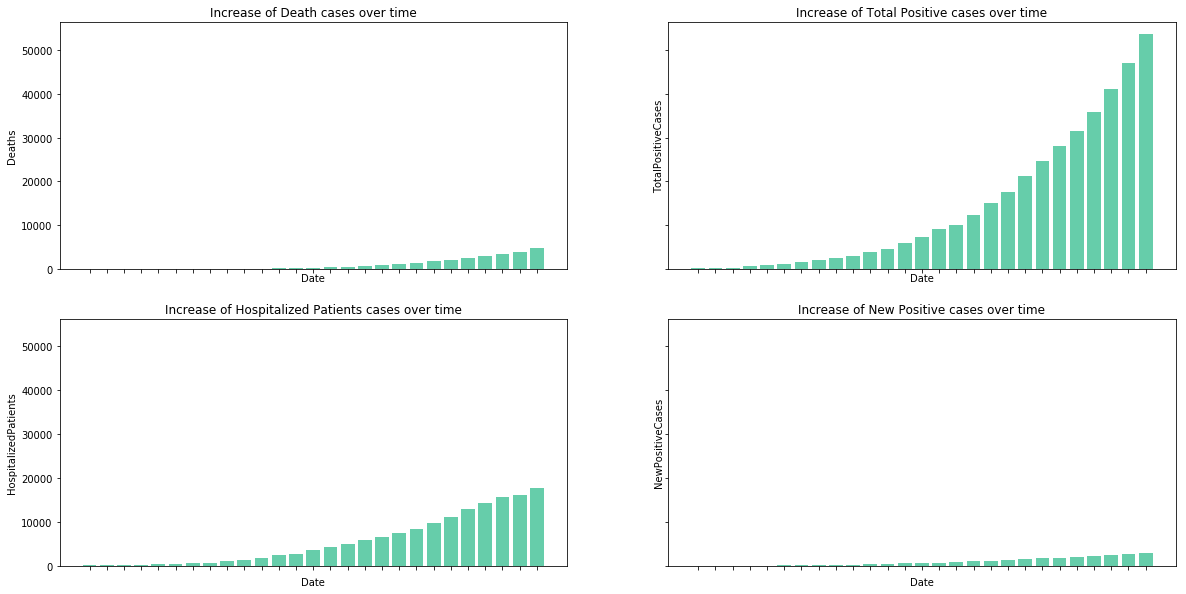

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)
df_group_by_date = df_italy[['Date','TotalPositiveCases','Deaths','HospitalizedPatients','IntensiveCarePatients']].groupby(['Date']).sum().reset_index()

axs[0,0].bar(df_group_by_date['Date'],df_group_by_date['Deaths'], color='mediumaquamarine')
axs[0,0].set_xticklabels([])
axs[0,0].set_xlabel('Date')
axs[0,0].set_ylabel('Deaths')
axs[0,0].set_title('Increase of Death cases over time')

axs[0,1].bar(df_group_by_date['Date'],df_group_by_date['TotalPositiveCases'], color='mediumaquamarine')
axs[0,1].set_xticklabels([])
axs[0,1].set_xlabel('Date')
axs[0,1].set_ylabel('TotalPositiveCases')
axs[0,1].set_title('Increase of Total Positive cases over time')

axs[1,0].bar(df_group_by_date['Date'],df_group_by_date['HospitalizedPatients'], color='mediumaquamarine')
axs[1,0].set_xticklabels([])
axs[1,0].set_xlabel('Date')
axs[1,0].set_ylabel('HospitalizedPatients')
axs[1,0].set_title('Increase of Hospitalized Patients cases over time')

axs[1,1].bar(df_group_by_date['Date'],df_group_by_date['IntensiveCarePatients'], color='mediumaquamarine')
axs[1,1].set_xticklabels([])
axs[1,1].set_xlabel('Date')
axs[1,1].set_ylabel('NewPositiveCases')
axs[1,1].set_title('Increase of New Positive cases over time')

plt.show()

## Which is the percentage of deaths ?   

We can see how many of the positive cases correspond to the death cases. 

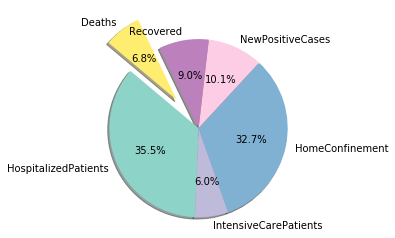

In [8]:
labels = ['HospitalizedPatients', 'IntensiveCarePatients',
'HomeConfinement','NewPositiveCases','Recovered','Deaths']
sizes = df_italy[labels].sum()
explode = np.zeros(sizes.shape[0])
explode[5] = 0.4
colors = cm.get_cmap('Set3', sizes.shape[0]).colors

plt.pie(sizes, labels=labels, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Distribution of positive cases 

With a 3d plot we can see how the positive cases are distributed among the location 

In [30]:
def create_3d_scatter(df, col_1, col_2, col_3, cluster_column, num_clusters, title, colors, z_labels): 
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('TotalPositiveCases', rotation=90)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels(total_positive_cases, total_positive_cases)
    axs = []

    for i in df[cluster_column].unique():
        d = df[df[cluster_column]==i]
        axs.append(ax.scatter(d[col_1], d[col_2], d[col_3], cmap=colors[i]))
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels(z_labels, z_labels)
    plt.show()


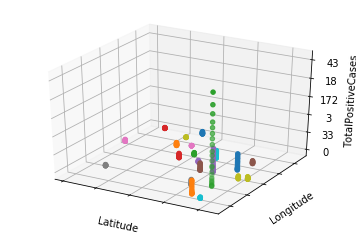

In [32]:
total_positive_cases = list(df_italy['TotalPositiveCases'].unique())
colors = plt.cm.Spectral(np.linspace(0, 1, len(total_positive_cases)))
colors = dict(zip(total_positive_cases,colors))
df_aux = pd.DataFrame()
for d in df_italy['Date'].unique():
    clear_output(wait=True)
    df_aux = df_aux.append(df_italy[df_italy['Date']==d])
    df_aux = df_aux[df_aux['TotalPositiveCases']>0]
    create_3d_scatter(df_aux,'Latitude', 'Longitude', 'TotalPositiveCases',
                      'RegionCode',len(df_aux['RegionCode'].unique()), '', colors, total_positive_cases)

    time.sleep(0.5)


## Bar plots 

We can use bar plots to visualize the amount of patients in each state in comparison with the other states. 

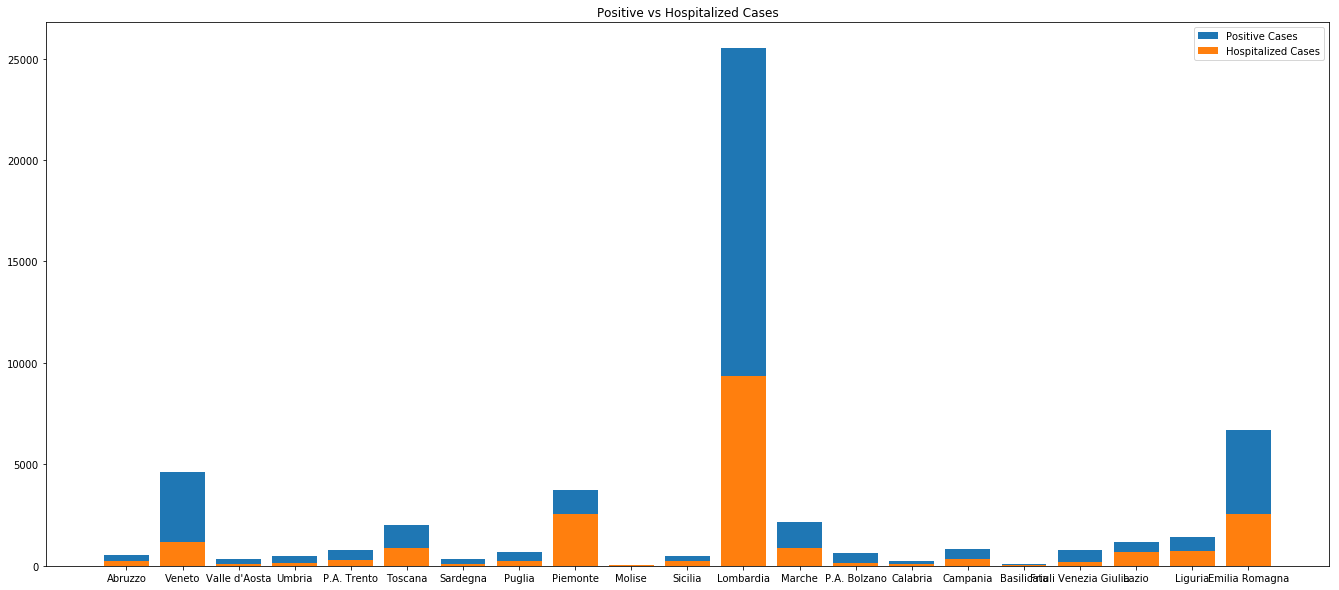

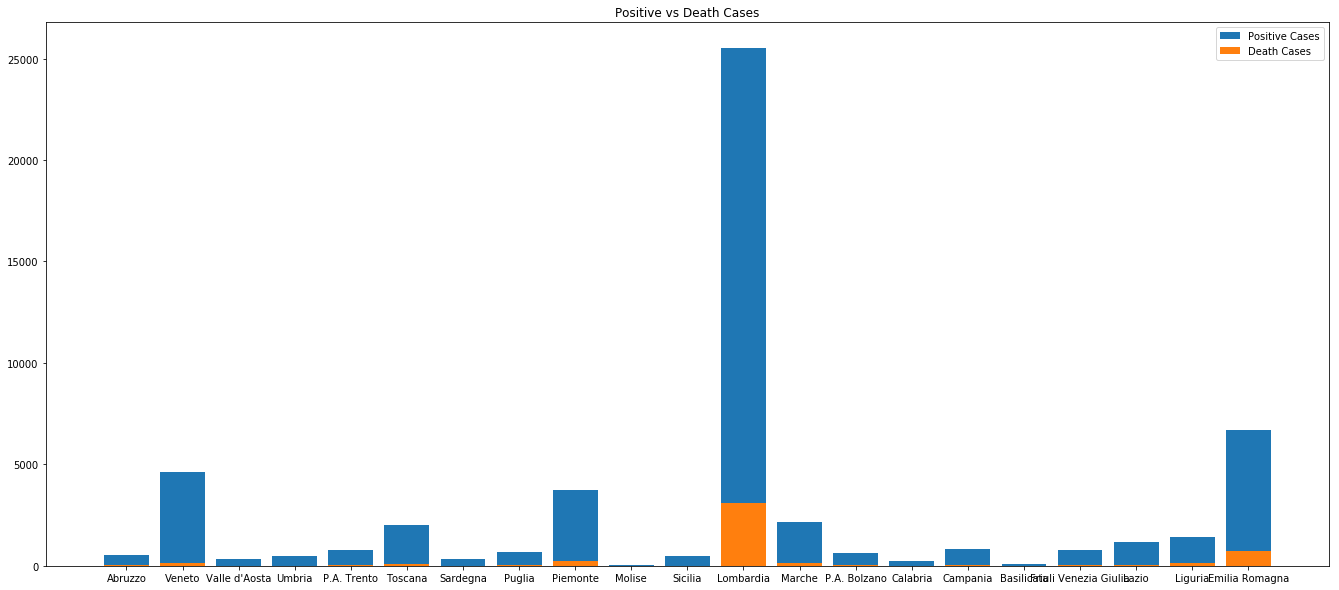

In [10]:
plt.figure(figsize=(23,10))
plt.bar(df_italy['RegionName'], df_italy['TotalPositiveCases'],label="Positive Cases")
plt.bar(df_italy['RegionName'], df_italy['TotalHospitalizedPatients'],label="Hospitalized Cases")

plt.legend()
plt.title('Positive vs Hospitalized Cases')
plt.show()

plt.figure(figsize=(23,10))
plt.bar(df_italy['RegionName'], df_italy['TotalPositiveCases'],label="Positive Cases")
plt.bar(df_italy['RegionName'], df_italy['Deaths'],label="Death Cases")
plt.legend()
plt.title('Positive vs Death Cases')
plt.show()